<a href="https://colab.research.google.com/github/raghav2069/Stock-market-prediction-using-CNN/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url='https://raw.githubusercontent.com/debmalya92/credit-card-defaulter-prediction/main/credit-card-default.csv'
df = pd.read_csv(url)
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [ ]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df['EDUCATION'].replace([0, 6], 5, inplace=True)

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [ ]:
df.MARRIAGE.value_counts()


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df['MARRIAGE'].replace(0, 3, inplace=True)

In [ ]:
df.MARRIAGE.value_counts()







2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
df.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
df.PAY_0.value_counts()
# In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

# ### Data Preparation and Model Building

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
# Dropping id column as it's no use
df.drop('ID',axis=1, inplace=True)

In [ ]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [ ]:
#Let's first fit a random forest model with default hyperparameters.
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.63      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

[[6648  410]
 [1237  705]]
0.817


In [ ]:
# The following hyperparameters are present in a random forest classifier. We will tune each parameters
# 
# 
# - **n_estimators** 
# - **criterion**
# - **max_features** 
# - **max_depth**
# - **min_samples_split**
# - **min_samples_leaf**
# - **min_weight_fraction_leaf**
# - **max_leaf_nodes**
# - **min_impurity_split**

# <hr>

# ### Tuning max_depth

# Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

In [ ]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}


In [ ]:
# instantiate the model
rf = RandomForestClassifier()

In [ ]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.910639,0.016111,0.033301,0.000556,2,{'max_depth': 2},0.797381,0.800000,0.800714,0.795000,...,0.797810,0.002225,4,0.799643,0.797083,0.800179,0.798631,0.799583,0.799024,0.001091
1,2.257169,0.013703,0.054022,0.004390,7,{'max_depth': 7},0.814286,0.821190,0.815714,0.815238,...,0.817190,0.002679,2,0.832500,0.831964,0.831548,0.834940,0.832798,0.832750,0.001177
2,3.449443,0.019346,0.073850,0.003148,12,{'max_depth': 12},0.818095,0.819762,0.820000,0.812857,...,0.817238,0.002721,1,0.883214,0.882143,0.882202,0.884940,0.885774,0.883655,0.001465
3,4.313730,0.027981,0.092797,0.001166,17,{'max_depth': 17},0.813095,0.814762,0.820238,0.810000,...,0.814905,0.003409,3,0.926488,0.927798,0.931488,0.929286,0.928571,0.928726,0.001664


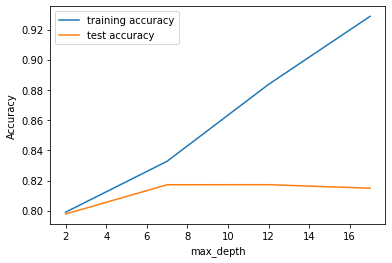

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)

In [ ]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.461499,0.017428,0.039357,0.000604,100,{'n_estimators': 100},0.813810,0.812381,0.811667,0.806190,...,0.810476,0.002797,2,0.812500,0.810238,0.812619,0.813452,0.811905,0.812143,0.001073
1,7.263124,0.047070,0.186254,0.005211,500,{'n_estimators': 500},0.814286,0.815238,0.811190,0.805238,...,0.810762,0.003784,1,0.812262,0.811012,0.812262,0.812679,0.812381,0.812119,0.000574
2,13.081913,0.041090,0.330326,0.004675,900,{'n_estimators': 900},0.812619,0.814524,0.811190,0.805000,...,0.810238,0.003407,3,0.811310,0.809881,0.811429,0.812738,0.812679,0.811607,0.001051
3,18.955167,0.180777,0.481946,0.007178,1300,{'n_estimators': 1300},0.810952,0.814524,0.811190,0.805714,...,0.810143,0.002961,4,0.811012,0.809464,0.811845,0.812857,0.812738,0.811583,0.001252


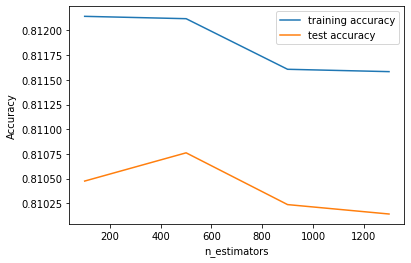

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

In [ ]:
# instantiate the model
rf = RandomForestClassifier(max_depth=4)


In [ ]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.466177,0.016850,0.039469,0.000503,4,{'max_features': 4},0.811667,0.814048,0.811429,0.806667,...,0.810000,0.003060,4,0.810774,0.810119,0.812500,0.813214,0.811310,0.811583,0.001129
1,2.542185,0.016500,0.041441,0.002373,8,{'max_features': 8},0.817619,0.820952,0.820476,0.817619,...,0.819190,0.001393,1,0.821369,0.820298,0.821667,0.821845,0.820833,0.821202,0.000568
2,4.092700,0.019708,0.039098,0.000656,14,{'max_features': 14},0.816905,0.821190,0.818095,0.817619,...,0.818524,0.001471,3,0.822143,0.820655,0.821667,0.822262,0.822500,0.821845,0.000654
3,5.710698,0.016342,0.038640,0.000469,20,{'max_features': 20},0.817857,0.821905,0.820238,0.817619,...,0.819000,0.001778,2,0.822976,0.821012,0.821905,0.822262,0.823274,0.822286,0.000803
4,0.044608,0.001064,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


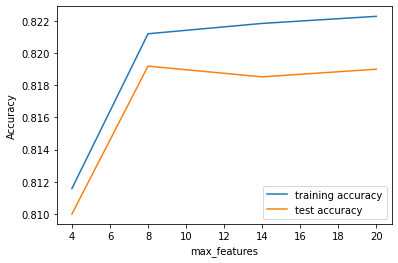

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Let's now check the optimum value for min samples leaf in our case.
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

In [ ]:
# instantiate the model
rf = RandomForestClassifier()

In [ ]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.712230,0.033796,0.061624,0.000765,100,{'min_samples_leaf': 100},0.813810,0.820714,0.817857,0.811429,...,0.815619,0.003274,1,0.816310,0.818155,0.818214,0.817679,0.818631,0.817798,0.000803
1,2.438685,0.022653,0.056975,0.000965,150,{'min_samples_leaf': 150},0.812857,0.812381,0.819048,0.811429,...,0.813286,0.002975,2,0.817857,0.809821,0.817976,0.816012,0.815536,0.815440,0.002973
2,2.256746,0.015388,0.054394,0.000464,200,{'min_samples_leaf': 200},0.810476,0.812619,0.810952,0.804762,...,0.809381,0.002726,3,0.809464,0.809286,0.810536,0.811250,0.811726,0.810452,0.000959
3,2.137768,0.020882,0.053139,0.002300,250,{'min_samples_leaf': 250},0.810476,0.810952,0.810000,0.804524,...,0.808667,0.002412,4,0.808452,0.808810,0.810060,0.811488,0.810357,0.809833,0.001097
4,2.017692,0.020713,0.052014,0.001703,300,{'min_samples_leaf': 300},0.811905,0.813810,0.807619,0.802381,...,0.808048,0.004308,5,0.809762,0.809048,0.809583,0.809107,0.805952,0.808690,0.001396


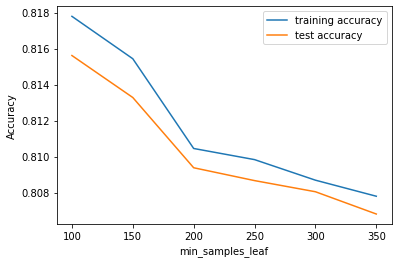

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}


In [ ]:
# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.621130,0.029878,0.068623,0.001193,200,{'min_samples_split': 200},0.817857,0.821905,0.820238,0.816667,...,0.819048,0.001838,1,0.824345,0.823452,0.823690,0.824226,0.823750,0.823893,0.000338
1,3.427989,0.014175,0.066905,0.002871,250,{'min_samples_split': 250},0.817619,0.821905,0.822143,0.816667,...,0.819000,0.002494,2,0.822083,0.821786,0.822857,0.822798,0.822024,0.822310,0.000435
2,3.344335,0.031648,0.063949,0.001941,300,{'min_samples_split': 300},0.817857,0.821905,0.820952,0.814524,...,0.818524,0.002649,3,0.822083,0.821131,0.821726,0.821786,0.821845,0.821714,0.000316
3,3.217731,0.029872,0.061916,0.001479,350,{'min_samples_split': 350},0.817857,0.820476,0.821190,0.814524,...,0.818524,0.002340,4,0.820952,0.820179,0.821250,0.821429,0.820833,0.820929,0.000430
4,3.149683,0.037353,0.060522,0.000529,400,{'min_samples_split': 400},0.817619,0.821429,0.819762,0.815000,...,0.818429,0.002154,5,0.820774,0.819643,0.820417,0.820833,0.821071,0.820548,0.000499


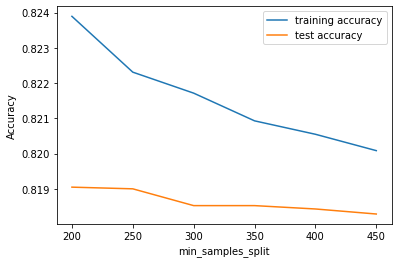

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# We can now find the optimal hyperparameters using GridSearchCV.
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

In [ ]:
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


We can get accuracy of 0.8183333333333334 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 200}


In [ ]:
type(grid_search.best_params_)

# Fitting the final model with the best parameters obtained from grid search.
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [ ]:
# fit
rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.70      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000

[[6760  298]
 [1256  686]]
0.8273333333333334


In [ ]:
# Saving the model to disk
pickle.dump(rfc, open('model.pkl', 'wb'))